# Import packages and data 

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scipy.stats
import anndata
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from scipy import sparse
matplotlib_axes_logger.setLevel('ERROR')

/Users/b8058304/.pyenv/versions/3.6.4/envs/py36/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [2]:
sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
# Set up the plot config for viewing the annotation clearly.
sc.settings.set_figure_params(dpi=120, dpi_save=1000)
sc.logging.print_versions()

scanpy==1.4.4 anndata==0.7.1 umap==0.3.10 numpy==1.17.1 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.2.post1 statsmodels==0.11.1 python-igraph==0.8.0 louvain==0.6.1


# Import the thymus DN T cells and ETP

In [3]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/thymus/data/fig1.h5ad')

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [4]:
adata.var_names_make_unique()

In [5]:
adata

AnnData object with n_obs × n_vars = 255901 × 33694 
    obs: 'Anno_level_1', 'Anno_level_2', 'Anno_level_3', 'Anno_level_4', 'Anno_level_5', 'Anno_level_fig1', 'Sample', 'donor', 'organ', 'sort', 'method', 'file', 'Anno_stage', 'Age', 'Gender', 'Source'
    obsm: 'X_umap'

In [6]:
adata.obs

Anno_level_1 Anno_level_2  \
index                                                               
FCAImmP7179369-AAACCTGAGCCCAATT                    T           SP   
FCAImmP7179369-AAACCTGAGCCTATGT                    T           SP   
FCAImmP7179369-AAACCTGAGTCGCCGT                    T           DP   
FCAImmP7179369-AAACCTGCAGCATGAG                    T           SP   
FCAImmP7179369-AAACCTGGTCTCCCTA                    T           SP   
...                                              ...          ...   
Human_colon_16S7985397-TTTGGTTCAAACCTAC            T           DP   
Human_colon_16S7985397-TTTGGTTCATGGTAGG            T           DP   
Human_colon_16S7985397-TTTGGTTTCAAGGTAA            T           DP   
Human_colon_16S7985397-TTTGTCAAGCTGAACG            T           DP   
Human_colon_16S7985397-TTTGTCAGTATTAGCC      Myeloid     Mac/Mono   

                                        Anno_level_3 Anno_level_4  \
index                                                               
FCAImmP7179369-AAACCTGAGCCCAATT              T_naive        CD8+T   
FCAImmP7179369-AAACCTGAGCCTATGT              T_naive        CD4+T   
FCAImmP7179369-AAACCTGAGTCGCCGT                   DP           DP   
FCAImmP7179369-AAACCTGCAGCATGAG              T_naive        CD8+T   
FCAImmP7179369-AAACCTGGTCTCCCTA             CD8αα(I)     CD8αα(I)   
...                                              ...          ...   
Human_colon_16S7985397-TTTGGTTCAAACCTAC           DP           DP   
Human_colon_16S7985397-TTTGGTTCATGGTAGG           DP           DP   
Human_colon_16S7985397-TTTGGTTTCAAGGTAA           DP           DP   
Human_colon_16S7985397-TTTGTCAAGCTGAACG           DP           DP   
Human_colon_16S7985397-TTTGTCAGTATTAGCC          Mac          Mac   

                                        Anno_level_5 Anno_level_fig1  \
index                                                                  
FCAImmP7179369-AAACCTGAGCCCAATT                CD8+T           CD8+T   
FCAImmP7179369-AAACCTGAGCCTATGT                CD4+T           CD4+T   
FCAImmP7179369-AAACCTGAGTCGCCGT                DP(P)              DP   
FCAImmP7179369-AAACCTGCAGCATGAG                CD8+T           CD8+T   
FCAImmP7179369-AAACCTGGTCTCCCTA             CD8αα(I)           CD8αα   
...                                              ...             ...   
Human_colon_16S7985397-TTTGGTTCAAACCTAC        DP(P)              DP   
Human_colon_16S7985397-TTTGGTTCATGGTAGG        DP(Q)              DP   
Human_colon_16S7985397-TTTGGTTTCAAGGTAA        DP(P)              DP   
Human_colon_16S7985397-TTTGTCAAGCTGAACG        DP(Q)              DP   
Human_colon_16S7985397-TTTGTCAGTATTAGCC          Mac             Mac   

                                                    Sample donor organ sort  \
index                                                                         
FCAImmP7179369-AAACCTGAGCCCAATT                 F21_TH_45P   F21    TH  45P   
FCAImmP7179369-AAACCTGAGCCTATGT                 F21_TH_45P   F21    TH  45P   
FCAImmP7179369-AAACCTGAGTCGCCGT                 F21_TH_45P   F21    TH  45P   
FCAImmP7179369-AAACCTGCAGCATGAG                 F21_TH_45P   F21    TH  45P   
FCAImmP7179369-AAACCTGGTCTCCCTA                 F21_TH_45P   F21    TH  45P   
...                                                    ...   ...   ...  ...   
Human_colon_16S7985397-TTTGGTTCAAACCTAC  F74_TH_TOT_5GEX_2   F74    TH  TOT   
Human_colon_16S7985397-TTTGGTTCATGGTAGG  F74_TH_TOT_5GEX_2   F74    TH  TOT   
Human_colon_16S7985397-TTTGGTTTCAAGGTAA  F74_TH_TOT_5GEX_2   F74    TH  TOT   
Human_colon_16S7985397-TTTGTCAAGCTGAACG  F74_TH_TOT_5GEX_2   F74    TH  TOT   
Human_colon_16S7985397-TTTGTCAGTATTAGCC  F74_TH_TOT_5GEX_2   F74    TH  TOT   

                                        method                    file  \
index                                                                    
FCAImmP7179369-AAACCTGAGCCCAATT           3GEX          FCAImmP7179369   
FCAImmP7179369-AAACCTGAGCCTATGT           3GEX          F

In [7]:
cell_numbers = adata.obs.groupby(["Anno_level_fig1"]).apply(len)
cell_numbers

Anno_level_fig1
B_memory       2161
B_naive        2152
B_plasma        479
B_pro/pre       290
CD4+T         14506
CD4+Tmem       2879
CD8+T         13257
CD8+Tmem       1644
CD8αα          6783
DC1            1383
DC2             770
DN            42474
DP            97183
ETP             316
Endo           5753
Epi_GCM2         74
Ery             644
Fb_1           7646
Fb_2           3579
Fb_cycling      524
ILC3            561
Lymph           115
Mac             863
Mast            148
Mgk              36
Mono            265
NK             1615
NKT             349
NMP             185
T(agonist)     3614
TEC(myo)        139
TEC(neuro)      341
Treg           7444
VSMC           3788
aDC             472
cTEC           9411
mTEC(I)        5287
mTEC(II)        808
mTEC(III)       309
mTEC(IV)         44
mcTEC           745
pDC            1048
αβT(entry)    11235
γδT            2582
dtype: int64

In [8]:
adata.obs["cell.labels"] = adata.obs["Anno_level_fig1"]

In [9]:
adata.obs["orig.ident"] = adata.obs["donor"]

In [10]:
dn_subset = adata[adata.obs['Anno_level_fig1'].isin(['DN'])].copy()

In [11]:
cell_numbers = dn_subset.obs.groupby(["Anno_level_fig1"]).apply(len)
cell_numbers

Anno_level_fig1
DN    42474
dtype: int64

In [12]:
dn_subset_more = sc.pp.subsample(dn_subset, n_obs=1000, random_state=26, copy=True)

In [13]:
dn_subset_more.shape

(1000, 33694)

In [14]:
cell_numbers = dn_subset_more.obs.groupby(["Anno_level_fig1"]).apply(len)
cell_numbers

Anno_level_fig1
DN    1000
dtype: int64

In [15]:
etp_subset = adata[adata.obs['Anno_level_fig1'].isin(['ETP'])].copy()

In [16]:
cell_numbers = etp_subset.obs.groupby(["Anno_level_fig1"]).apply(len)
cell_numbers

Anno_level_fig1
ETP    316
dtype: int64

In [17]:
dn_subset_more.obs["dataset"] = "thymus"
etp_subset.obs["dataset"] = "thymus"

In [18]:
thymus_dn=dn_subset_more
thymus_etp=etp_subset

# Import the FBM ELP and HSC

In [19]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/bm_plus_19pcw/data/bm_plus_19pcw_raw_dr_20201007.h5ad')

In [20]:
adata

AnnData object with n_obs × n_vars = 103228 × 33712 
    obs: 'cell.labels', 'doublets', 'fetal.ids', 'gender', 'is_doublet', 'is_doublet_poptrim', 'is_doublet_wolock', 'lanes', 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'processing.type', 'scrublet_cluster_score', 'scrublet_score', 'sequencing.type', 'sort.ids', 'april_cell.labels', 'cell.labels_20200708', 'cell.labels_20200713', 'cell.labels_20200718', 'nk_meta', 'mito.threshold'
    var: 'gene_ids-1', 'feature_types-1'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'

In [21]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
CD4 T cell             327
CD8 T cell             171
CD14 monocyte         8763
CD56 bright NK         449
CMP                    425
                      ... 
schwann cells            9
sinusoidal EC          550
stromal macrophage    1464
tDC                    193
tip EC                 362
Length: 64, dtype: int64

In [22]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [23]:
adata = adata[adata.obs['cell.labels'].isin(['HSC', 'ELP'])].copy()

In [24]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
ELP    1357
HSC      92
dtype: int64

In [25]:
adata.obs["dataset"] = "FBM"

In [26]:
fbm = adata

# Import the liver ELP and HSC 

In [27]:
adata = sc.read('/Users/b8058304/Documents/PhD_work/Coding/liver/data/fetal_liver_alladata_Copy1.h5ad')

In [28]:
adata

AnnData object with n_obs × n_vars = 113063 × 27080 
    obs: 'nGene', 'nUMI', 'orig.ident', 'percent.mito', 'fetal.ids', 'sort.ids', 'tissue', 'lanes', 'stages', 'sample.type', 'gender', 'AnnatomicalPart', 'doublets', 'cell.labels', 'combined.labels', 'batch', 'sample', 'n_counts', 'cell.labels_progen'
    obsm: 'X_fdg', 'X_tsne', 'X_umap'

In [29]:
cell_numbers = adata.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
B cell                            1079
DC1                                336
DC2                               3954
DC precursor                       330
Early Erythroid                  11985
Early lymphoid_T lymphocyte        767
Endothelial cell                  3348
Fibroblast                        1713
HSC_MPP                           3439
Hepatocyte                        2479
ILC precursor                     1726
Kupffer Cell                     24841
Late Erythroid                    3180
MEMP                              1342
Mast cell                         1308
Megakaryocyte                     3983
Mid Erythroid                    27000
Mono-Mac                          6590
Monocyte                          2586
Monocyte precursor                 350
NK                                6706
Neutrophil-myeloid progenitor      658
Pre pro B cell                     234
VCAM1+ EI macrophage               161
pDC precursor                      253
pre-B cell   

In [30]:
from scipy import sparse
array_vals = adata.X
adata.X = sparse.csr_matrix(adata.X)
adata.raw = adata
adata.X = array_vals

In [31]:
elt = adata[adata.obs['cell.labels'].isin(['Early lymphoid_T lymphocyte', 'Pre pro B cell'])].copy()

In [32]:
cell_numbers = elt.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
Early lymphoid_T lymphocyte    767
Pre pro B cell                 234
dtype: int64

In [33]:
hsc_mpp = adata[adata.obs['cell.labels'].isin(['HSC_MPP'])].copy()

In [34]:
cell_numbers = hsc_mpp.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
HSC_MPP    3439
dtype: int64

In [35]:
hsc_mpp_2 = sc.pp.subsample(hsc_mpp, n_obs=1000, random_state=26, copy=True)

In [36]:
hsc_mpp_2.obs["dataset"] = "LIVER"
elt.obs["dataset"] = "LIVER"

# Combine the datasets

In [37]:
hsc_mpp_2.X = hsc_mpp_2.X.toarray()
elt.X = elt.X.toarray()

In [38]:
from scipy import sparse

objects = [hsc_mpp_2, elt, thymus_dn, thymus_etp, fbm]

for i in objects:
    array_vals = i.X
    i.X = sparse.csr_matrix(i.X)
    i.raw = i
    i.X = array_vals

In [39]:
merged = thymus_etp.concatenate(thymus_dn, hsc_mpp_2, elt, fbm, index_unique=None, join='inner')

In [40]:
merged.shape

(4766, 27061)

In [41]:
cell_numbers = merged.obs.groupby(["cell.labels"]).apply(len)
cell_numbers

cell.labels
DN                             1000
ELP                            1357
ETP                             316
Early lymphoid_T lymphocyte     767
HSC                              92
HSC_MPP                        1000
Pre pro B cell                  234
dtype: int64

In [42]:
merged.obs["dataset_cell.labels"] = merged.obs["dataset"].astype(str) + '_' + merged.obs["cell.labels"].astype(str)

In [43]:
cell_numbers = merged.obs.groupby(["dataset_cell.labels"]).apply(len)
cell_numbers

dataset_cell.labels
FBM_ELP                              1357
FBM_HSC                                92
LIVER_Early lymphoid_T lymphocyte     767
LIVER_HSC_MPP                        1000
LIVER_Pre pro B cell                  234
thymus_DN                            1000
thymus_ETP                            316
dtype: int64

# Pre-process the data

In [44]:
adata=merged

In [45]:
# normalise count data 
sc.pp.normalize_total(adata)

In [46]:
# log the count data 
sc.pp.log1p(adata)

In [47]:
# find variable genes
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) 

In [48]:
# scale the data 
sc.pp.scale(adata, max_value=10)
# scale the negative values in adata.X (which have been normalised, logged and scaled) to zero 
adata.X = np.where(adata.X < 0, 0, adata.X)

In [49]:
# run pca
sc.tl.pca(adata, n_comps=50)

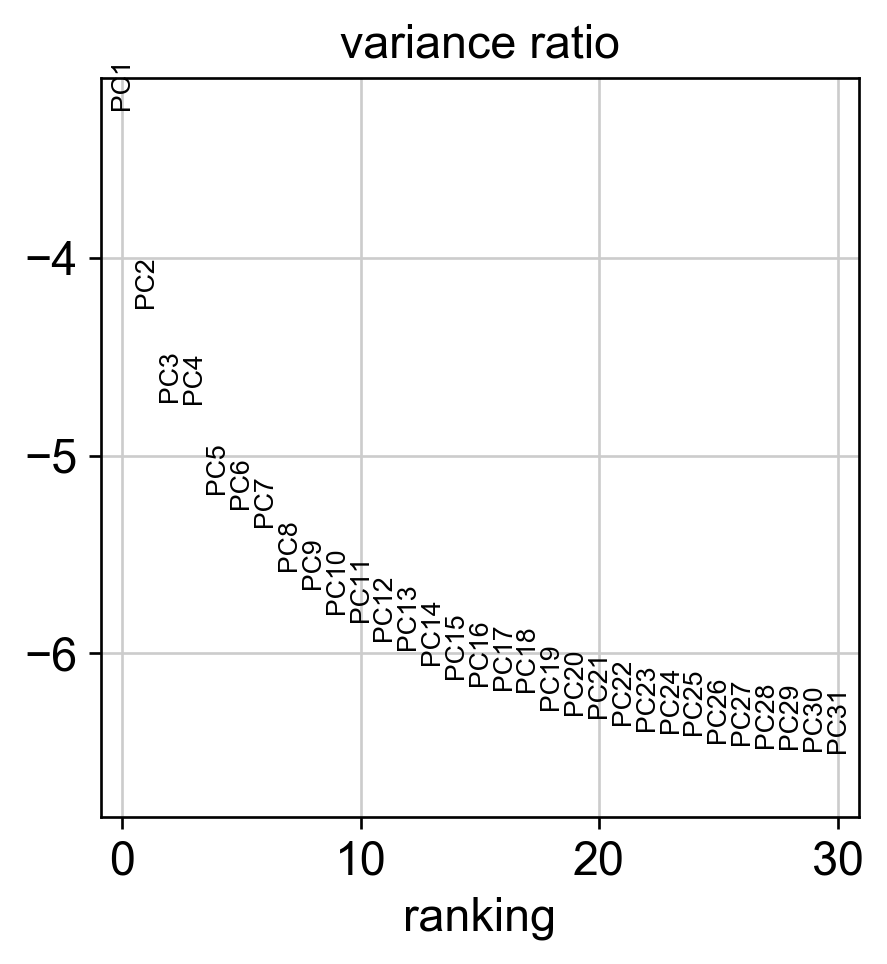

In [50]:
# have a look at pc's in order to choose number of pcs that will be used downstream 
sc.pl.pca_variance_ratio(adata, log=True)

In [51]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [52]:
# run umap
sc.tl.umap(adata) 

... storing 'Age' as categorical
... storing 'AnnatomicalPart' as categorical
... storing 'Anno_level_1' as categorical
... storing 'Anno_level_2' as categorical
... storing 'Anno_level_3' as categorical
... storing 'Anno_level_4' as categorical
... storing 'Anno_level_5' as categorical
... storing 'Anno_level_fig1' as categorical
... storing 'Anno_stage' as categorical
... storing 'Gender' as categorical
... storing 'Sample' as categorical
... storing 'Source' as categorical
... storing 'april_cell.labels' as categorical
... storing 'cell.labels' as categorical
... storing 'cell.labels_20200708' as categorical
... storing 'cell.labels_20200713' as categorical
... storing 'cell.labels_20200718' as categorical
... storing 'cell.labels_progen' as categorical
... storing 'combined.labels' as categorical
... storing 'dataset' as categorical
... storing 'donor' as categorical
... storing 'doublets' as categorical
... storing 'fetal.ids' as categorical
... storing 'file' as categorical
... s

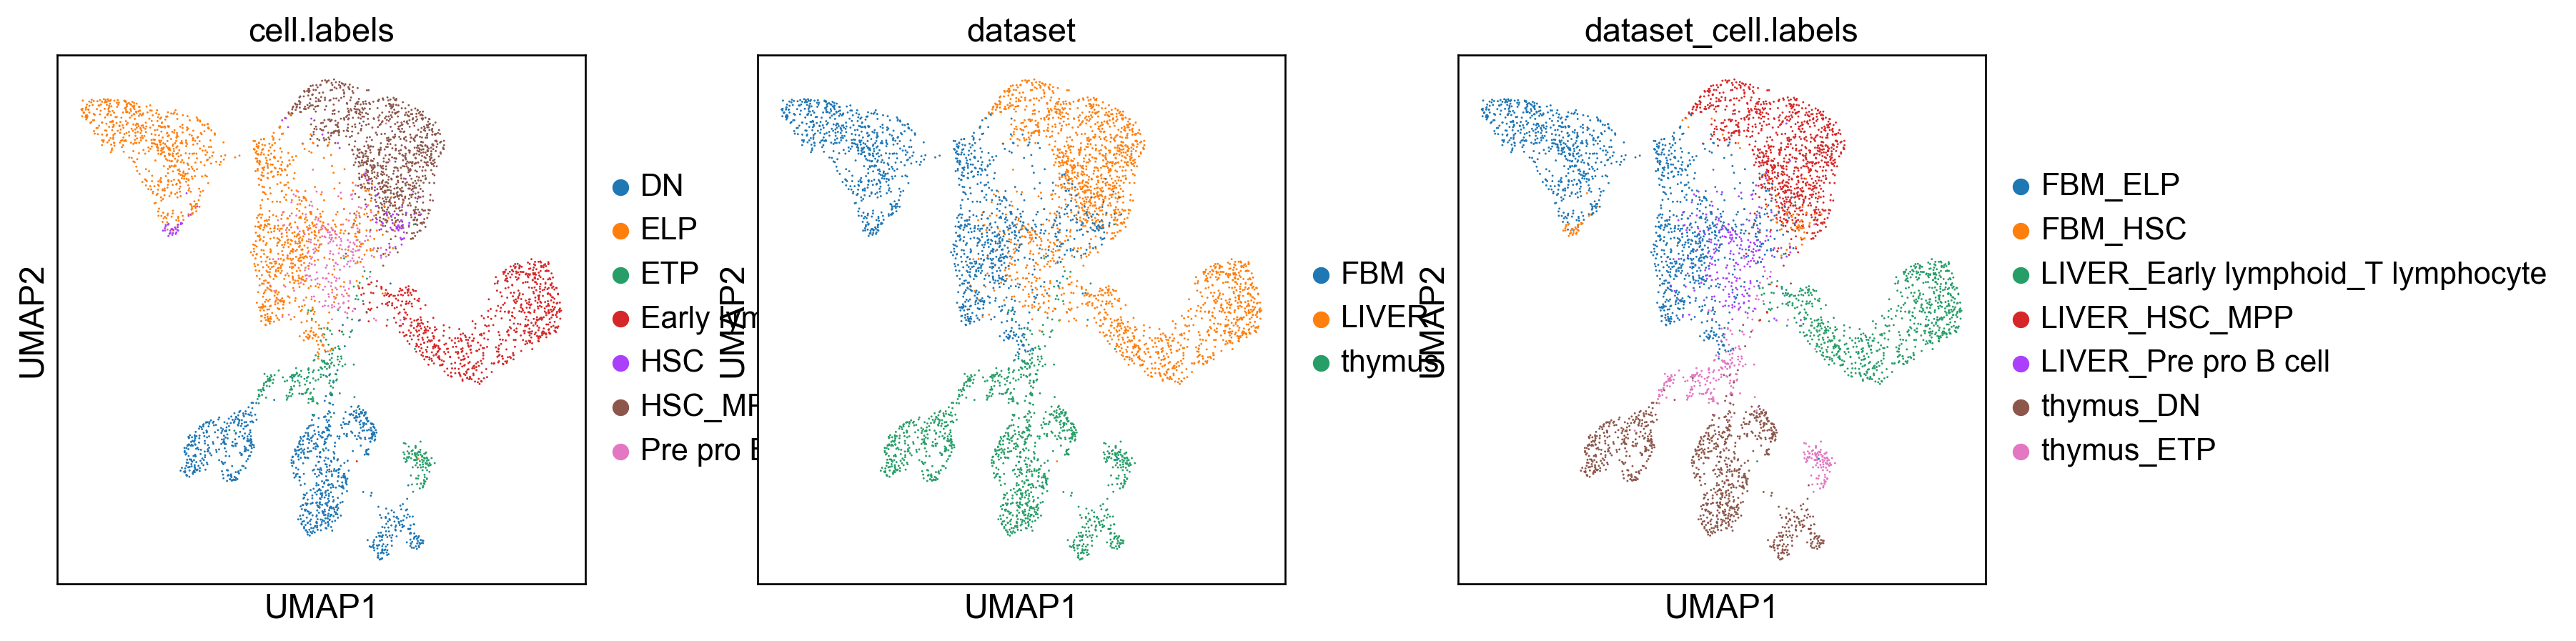

In [53]:
sc.pl.umap(adata, color=['cell.labels', 'dataset', 'dataset_cell.labels'], size=3) 

# Run harmony batch correction

In [54]:
#harmony prep - save pca and batch (sample) metadata columns 
pca = adata.obsm['X_pca']
batch = adata.obs['orig.ident']

In [55]:
# load up harmony in rpy2
%load_ext rpy2.ipython

In [56]:
%%R -i pca -i batch -o hem

library(harmony)
library(magrittr)

hem = HarmonyMatrix(pca, batch, theta=3, verbose=TRUE, do_pca=FALSE)
hem = data.frame(hem)

R[write to console]: Loading required package: Rcpp

R[write to console]: Harmony 1/10

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[

In [57]:
# save old pca values or orig.pca and save batch corrected pca results in anndata object as x_pca
adata.obsm['X_orig_pca'] = adata.obsm['X_pca']
adata.obsm['X_pca'] = hem.values

# Add dimensional reduction post-harmony

In [58]:
# run snn neighbourhood graph
sc.pp.neighbors(adata, n_neighbors=40, n_pcs=10) 

In [59]:
# run umap
sc.tl.umap(adata) 

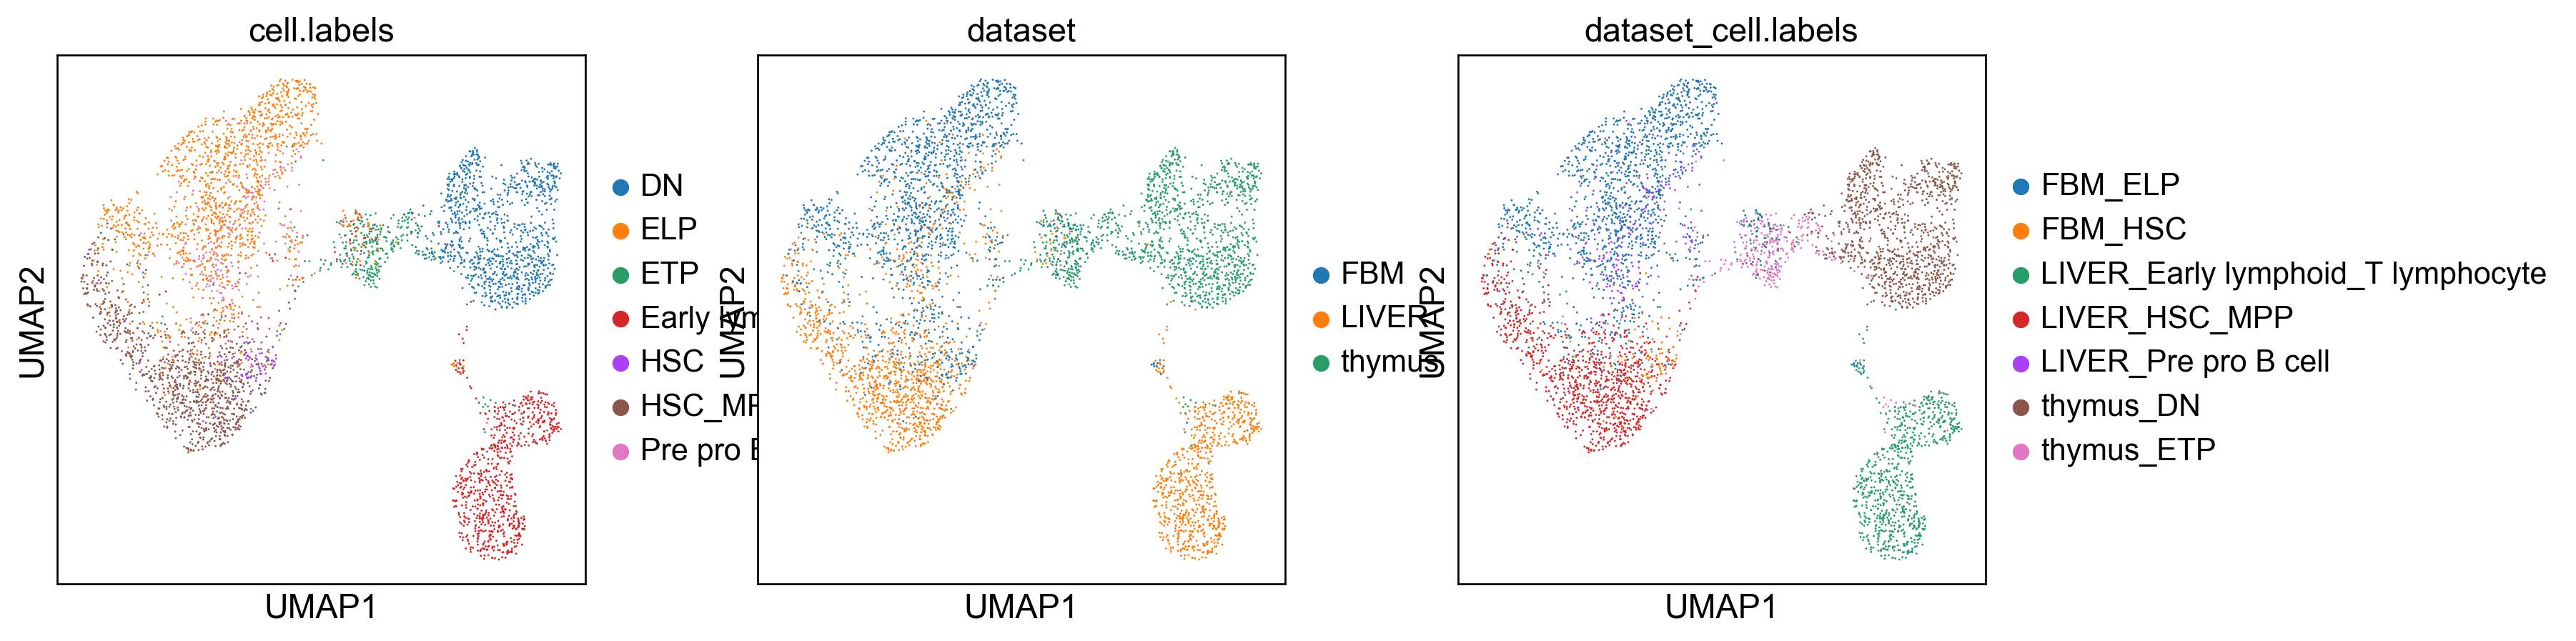

In [60]:
sc.pl.umap(adata, color=['cell.labels', 'dataset', 'dataset_cell.labels'], size=3) 

In [61]:
adata.obs["cell.labels"] = adata.obs["cell.labels"].astype('category')
adata.obs["cell.labels"].cat.categories

Index(['DN', 'ELP', 'ETP', 'Early lymphoid_T lymphocyte', 'HSC', 'HSC_MPP',
       'Pre pro B cell'],
      dtype='object')

In [62]:
sc.settings.set_figure_params(dpi=1000, dpi_save=1000)
sc.pl.umap(adata, color=['dataset_cell.labels'], size=20, save="fig3g_thymus_etp_overlay_20210115.pdf") 

# Save the cross tissue ETP data

In [63]:
adata.write('/Users/b8058304/Documents/PhD_work/Coding/manuscript_figs_mk2/data/fig3g_etp_data_20210115.h5ad')